In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
#from skimage import io
from skimage.color import rgb2gray, gray2rgb
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from matplotlib.patches import Circle

In [6]:
coin = imageio.imread("coins.jpg")
coin = rgb2gray(coin)

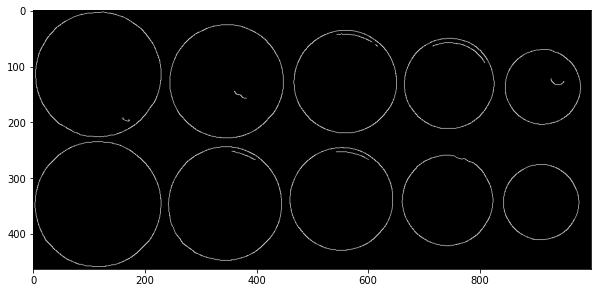

In [7]:
coin_edge = canny(coin, sigma=3)
plt.figure(figsize=(10,8))
plt.imshow(coin_edge, cmap='gray')

In [8]:
res = 0.12
radius = [27.25,24.5,22.25,19.7,16.3]
radii = []
for i in range(len(radius)):
    radii.append(int(radius[i]/res * 0.5))
radii    

[113, 102, 92, 82, 67]

In [9]:
def detect_coins(radius):
    for i in range(len(radius)):
        hough_res = hough_circle(coin_edge, radius[i])
        _, cx, cy, _ = hough_circle_peaks(hough_res, radius, total_num_peaks=2)
        
        print(cx,cy)
        fig,ax = plt.subplots(1,figsize=(10,8))
        ax.imshow(coin, cmap='gray')

        for xx,yy in zip(cx,cy):
            circ = Circle((xx,yy),radius[i])
            ax.add_patch(circ)

[116 116] [347 113]
[343 347] [345 128]
[552 559] [337 128]
[747 743] [132 130]
[910 913] [343 137]


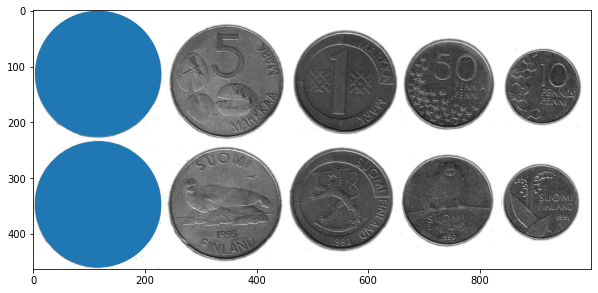

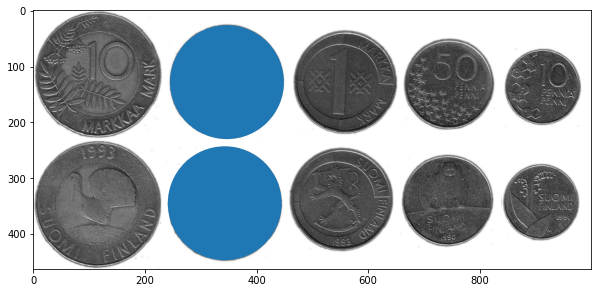

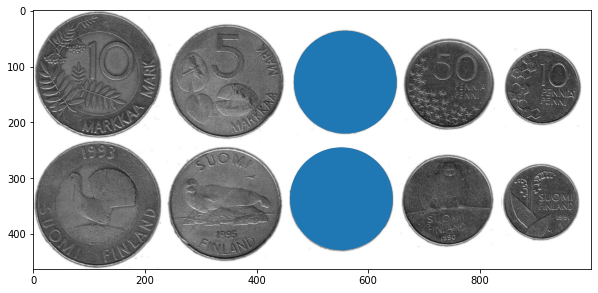

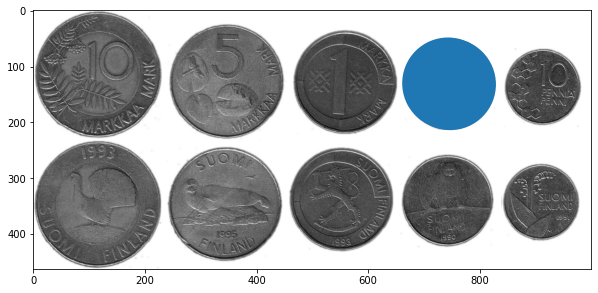

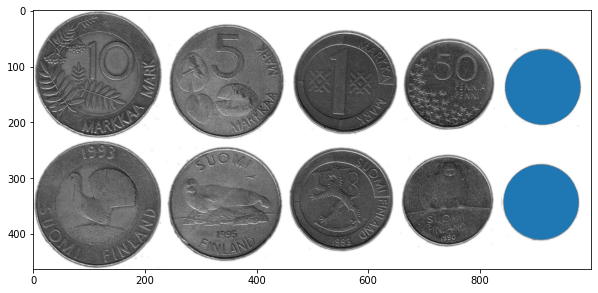

In [10]:
detect_coins(radii)

# 2 ORB feature detectors

In [11]:
from skimage.transform import AffineTransform, warp
from skimage.feature import ORB, match_descriptors, plot_matches

In [12]:
elbp = imageio.imread("Elbphilharmonie.jpg")
elbp = rgb2gray(elbp)

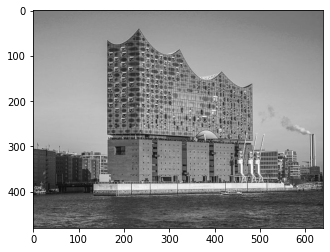

In [13]:
plt.imshow(elbp,cmap='gray')

In [14]:
affine = AffineTransform(matrix=None, scale=(0.5,0.5), rotation=0.34, shear=None, translation=(300,300) )

In [15]:
elbp_affine = warp(elbp, affine)

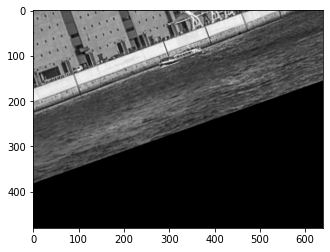

In [16]:
plt.imshow(elbp_affine,cmap='gray')

In [17]:
descriptor_extractor = ORB(n_keypoints=100)

In [18]:
descriptor_extractor.detect_and_extract(elbp)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

In [19]:
descriptor_extractor.detect_and_extract(elbp_affine)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

In [20]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

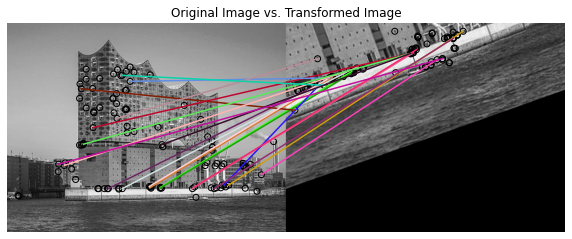

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

plt.gray()

plot_matches(ax, elbp, elbp_affine, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")

plt.show()